# Машинное обучение 2020

## Факультет математики НИУ ВШЭ

Лектор: Илья Щуров

Семинаристы: Руслан Хайдуров, Соня Дымченко

# Семинар 2

На этом семинаре мы:

- посмотрим, как можно проводить эксперименты из области математической статистики с помощью Python
- познакомимся со статистической библиотекой SciPy
- проверим работу центральной предельной теоремы
- будем проводить собственные исследования!

## 1 Знакомство с SciPy

С помощью языка Python можно проводить эксперименты из области математической статистики. Например, библиотека для научных и инженерных расчетов [SciPy](http://scipy.github.io/devdocs/index.html) содержит модуль [stats](http://scipy.github.io/devdocs/stats.html#module-scipy.stats), позволяющий работать с распределениями и статистическими функциями. Посмотрим, что можно делать с помощью него.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

%matplotlib inline

plt.style.use('ggplot')

In [ ]:
# чтобы заработало, почему-то нужно писать в другой ячейке, отдельно от импортирования библиотек
plt.rcParams["figure.figsize"] = (10,7)

Зададим нормально распределенную случайную величину с параметрами $\mu = 1$ и $\sigma = 0.5$:

In [ ]:
mu = 1
sigma = 0.5

# loc - параметр среднего, scale - параметр среднеквадратичного отклонения
norm_rv = sts.norm(loc=mu, scale=sigma)

Построим график функции распределения:

In [ ]:
x = np.linspace(-1, 3, 100)
norm_cdf = norm_rv.cdf(x)
#plt.figure(figsize=(10,7))
plt.plot(x, norm_cdf)
plt.title('Normal RV CDF')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$F(x)$', fontsize=16)
plt.show()

Давайте добавим еще распределений!

In [ ]:
# равномерное непрерывное
a = -1
b = 3
# loc - параметр левой границы, scale - параметр масштаба (то есть правая граница - loc+scale)
uniform_rv = sts.uniform(loc=a, scale=b-a)

# биномиальное
n = 5
p = 0.5
binom_rv = sts.binom(n=n, p=p)

# Пуассона
mu = 5
poisson_rv = sts.poisson(mu=mu)

In [ ]:
x = np.linspace(-1, 10, 10000)
norm_cdf = norm_rv.cdf(x)
uniform_cdf = uniform_rv.cdf(x)
binom_cdf = binom_rv.cdf(x)
poisson_cdf = poisson_rv.cdf(x)
plt.plot(x, norm_cdf, label='normal')
plt.plot(x, uniform_cdf, label='uniform')
plt.plot(x, binom_cdf, label='binomial')
plt.plot(x, poisson_cdf, label='poisson')
plt.title('Multiple RV CDFs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$F(x)$', fontsize=16)
plt.legend(loc='best')
plt.show()

In [ ]:
x = np.linspace(-1, 10, 10000)
norm_pdf = norm_rv.pdf(x)
uniform_pdf = uniform_rv.pdf(x)
binom_pdf = binom_rv.pmf(x)
poisson_pdf = poisson_rv.pmf(x)
plt.plot(x, norm_pdf, label='normal')
plt.plot(x, uniform_pdf, label='uniform')
plt.plot(x, binom_pdf, label='binomial')
plt.plot(x, poisson_pdf, label='poisson')
plt.title('Multiple RV PDFs & PMFs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$p(x)$', fontsize=16)
plt.legend(loc='best')
plt.show()

Сгенерируем выборку нормальной случайной величины, упомянутой ранее:

In [ ]:
# выбираем число, задающее генератор случайных чисел, чтобы всегда получать один и тот же результат
np.random.seed(0)

norm_sample = norm_rv.rvs(size=1000)

Посчитайте с помощью этой выборки доверительный интервал для среднего с уровнем доверия $95\%$. Исходя из теоретических соображений, доверительный интервал с уровнем доверия $1 - \alpha$ может быть представлен в следующем виде:
$$
\left(\hat{\mu} - z_{1 - \frac{\alpha}{2}}\frac{\hat{se}\left(\hat{\mu}\right)}{\sqrt{n}}, \ \hat{\mu} + z_{1 - \frac{\alpha}{2}}\frac{\hat{se}\left(\hat{\mu}\right)}{\sqrt{n}}\right)
$$
Оценку $\hat{\mu}$ можно получить методом максимального правдоподобия - она будет равна выборочному среднему. Аналогично, оценка стандартной ошибки $\hat{se}\left(\hat{\mu}\right)$ будет выборочным стандартным отклонением. Квантиль же в нашем случае равен $z_{0.975}$.

_Квантиль можно посчитать с помощью функции scipy.stats.norm.ppf()_

In [ ]:
def CI_calculate(sample):
    # YOUR CODE
    return (CI_left_bound, CI_right_bound)

Содержит ли построенный интервал искомое значение среднего? А если провести эксперимент много раз, какая доля построенных доверительных интервалов будет содержать это значение? Убедитесь в этом на практике.

In [ ]:
# YOUR CODE HERE

(btw, прикольная визуализация: http://rpsychologist.com/d3/CI/)

Проделайте похожий опыт, но с одновыборочным t-критерием Стьюдента. Сгенерируйте выборку той же нормальной случайной величины и проверьте гипотезу о равенстве средних.

_Таблица критических значений t-критерия Стьюдента:_ http://www.statisticshowto.com/tables/t-distribution-table/

In [ ]:
# YOUR CODE HERE
# выбираем число, задающее генератор случайных чисел, чтобы всегда получать один и тот же результат
np.random.seed(0)

А что будет, если повторить эксперимент много раз? Какова доля (ошибочно) отвергнутых нулевых гипотез?

In [ ]:
# YOUR CODE HERE

## 2 Проверка ЦПТ

Проверим работу центральной предельной теоремы. Выберем какое-нибудь распределение, не очень похожее на нормальное - например, [Распределение хи-квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82). Построим случайную величину, имеющую данное распределение, с заданными параметрами:

In [109]:
# число степеней свободы
df = 4

chi2_rv = sts.chi2(df=df)

Сгенерируем выборку размера 1000:

In [110]:
sample = chi2_rv.rvs(size=1000)

In [111]:
sample[:10]

array([10.27765915,  4.47696182, 10.85426455,  1.39317289,  3.07386306,
        4.50986005,  5.70973391,  3.65747011,  4.61574384,  4.27123407])

Построим гистограмму выборки, изобразив поверх нее теоретическую плотность распределения рассматриваемой случайной величины:

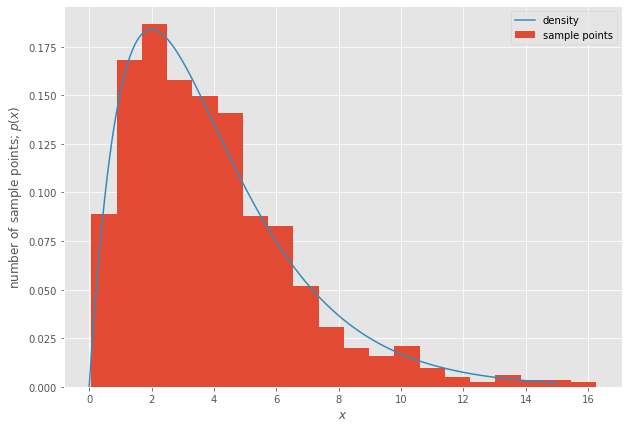

In [112]:
# сначала строим гистограмму выборки
plt.hist(sample, bins=20, density=True, label='sample points')
# теперь строим график плотности
x = np.linspace(0, 15, 10000)
chi2_pdf = chi2_rv.pdf(x)
plt.plot(x, chi2_pdf, label='density')
plt.xlabel('$x$')
plt.ylabel('number of sample points; $p(x)$')
plt.legend(loc='best')
plt.show()

Согласно ЦПТ, выборочное среднее выборки объема $n$ будет иметь распределение, близкое к $N\left(\mu, \frac{\sigma^2}{n}\right)$. Мы рассматриваем распределение хи-квадрат с $k=4$ степенями свободы. В этом случае $\mu = k = 4$, $\sigma^2 = 2k = 8$. Таким образом, $\bar{X}_n \to N\left(4, \frac{8}{n}\right)$ по распределению. 

Теперь проверим это на практике. Будем генерировать набор выборок размера $n$ (например, 1000 выборок размера $n$), считать набор их выборочных средних, строить их гистограммы и соотносить их с теоретической плотностью соответствующего нормального распределения. Для этого напишем функцию:

In [120]:
def sample_mean_distr(n):
    mean_mas = []
    normal_chi2 = sts.norm(mu=4, sigma=2/np.sqrt(1000))
    for i in range(n):
        x = chi2_rv.rvs(size=1000)
        mean_mas.append(x.mean())
    plt.hist(mean_mas, bins=50)
    plt.show()

Посмотрим, что получается при подстановке различных значений $n$.

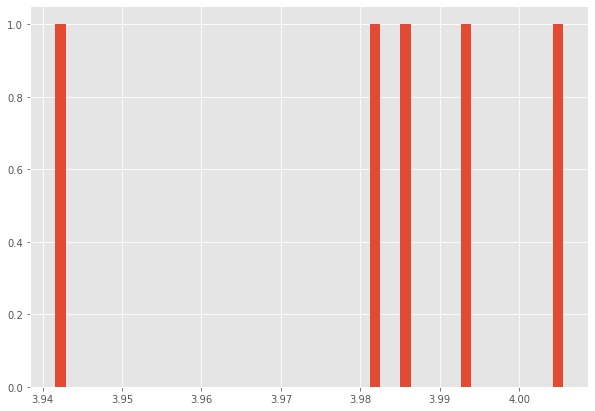

In [121]:
sample_mean_distr(5)

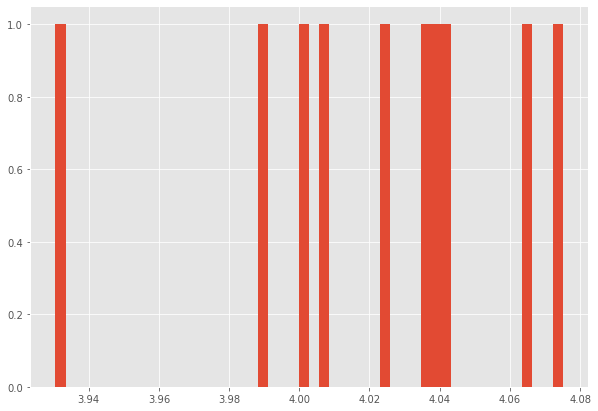

In [122]:
sample_mean_distr(10)

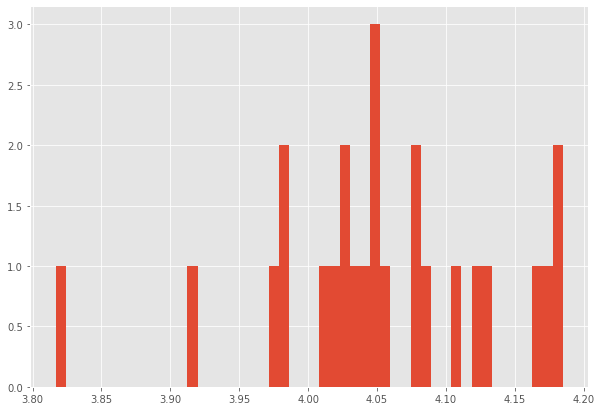

In [123]:
sample_mean_distr(25)

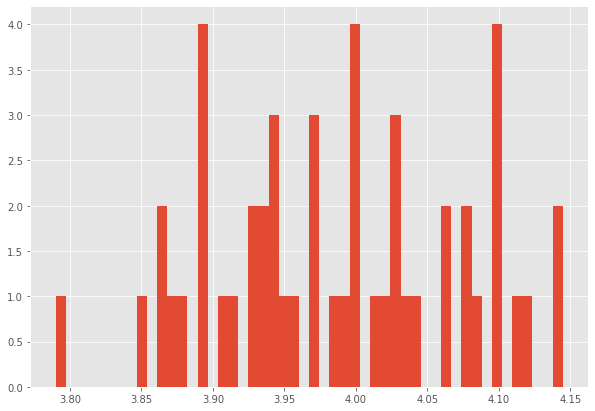

In [124]:
sample_mean_distr(50)

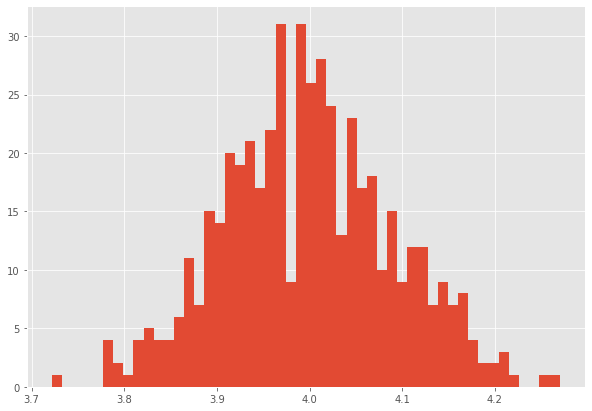

In [127]:
sample_mean_distr(500)

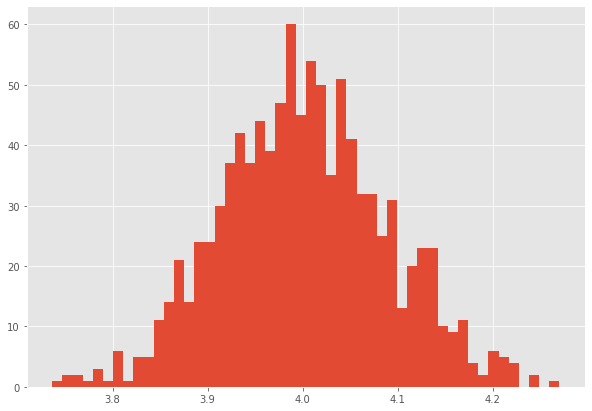

In [126]:
sample_mean_distr(1000)

Какой вывод можно сделать из этого небольшого проделанного исследования?

## 3 Квартет Энскомба

Рассмотрим четыре различных набора пар $\left(x_n, y_n\right)$.

In [ ]:
data = pd.read_csv('anscombe.csv', index_col=0)

In [ ]:
data

Посчитайте выборочное среднее и выборочную дисперсию для каждого столбца.

In [ ]:
for col in data.columns:
    # YOUR CODE HERE
    print(col, col_mean, col_var)

Найдите коэффициент корреляции Пирсона для каждой пары $(x_n, y_n)$.

In [ ]:
for i in range(4):
    # YOUR CODE HERE
    print(x_name, y_name, pearson_corr)

__Упражнение__: сделайте то же самое, **не пользуясь функциями .mean(), .std() .var(), pearsonr()** (и проверьте свой ответ с помощью них).

Теперь изобразите диаграмму рассеяния для каждой из пар $\left(x_n, y_n\right)$ вместе с прямой линейной регрессии $y = 3 + 0.5x$, обозначенной другим цветом.

In [ ]:
for i in range(4):
    # YOUR CODE HERE
    plt.title('scatterplot #' + str(i + 1))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()